In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Analysis

In [240]:
df = pd.read_csv("fraudTrain.csv")
df = df.drop("Unnamed: 0", axis=1)
df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [241]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [242]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cc_num,1296675.0,4.171920e+17,1.308806e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1296675.0,7.035104e+01,1.603160e+02,1.000000e+00,9.650000e+00,4.752000e+01,8.314000e+01,2.894890e+04
zip,1296675.0,4.880067e+04,2.689322e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.978300e+04
lat,1296675.0,3.853762e+01,5.075808e+00,2.002710e+01,3.462050e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1296675.0,-9.022634e+01,1.375908e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1296675.0,8.882444e+04,3.019564e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.032800e+04,2.906700e+06
unix_time,1296675.0,1.349244e+09,1.284128e+07,1.325376e+09,1.338751e+09,1.349250e+09,1.359385e+09,1.371817e+09
merch_lat,1296675.0,3.853734e+01,5.109788e+00,1.902779e+01,3.473357e+01,3.936568e+01,4.195716e+01,6.751027e+01
merch_long,1296675.0,-9.022646e+01,1.377109e+01,-1.666712e+02,-9.689728e+01,-8.743839e+01,-8.023680e+01,-6.695090e+01
is_fraud,1296675.0,5.788652e-03,7.586269e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [244]:
df.isnull().sum().sum()

0

In [245]:
df[df['is_fraud'] == 1]['gender'].value_counts()

gender
M    3771
F    3735
Name: count, dtype: int64

In [246]:
# What years of data we have?
pd.to_datetime(df['trans_date_trans_time']).dt.year.unique()

array([2019, 2020])

In [247]:
pd.to_datetime(df['trans_date_trans_time']).dt.month_name().unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [248]:
custom_palette = {
    2019: 'skyblue',
    2020: 'salmon'
}

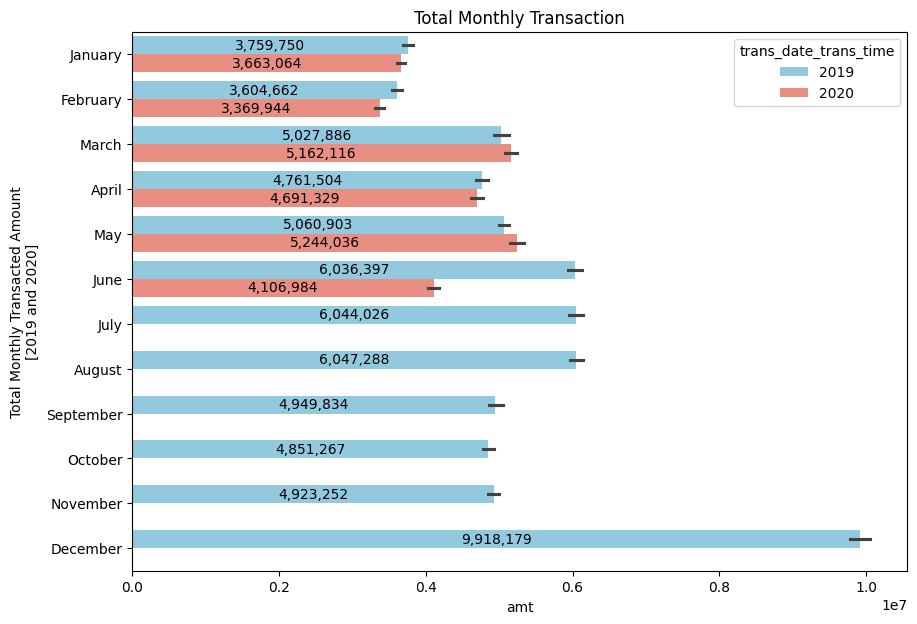

In [249]:
#Total Amount vs Month (in both years)
plt.figure(figsize=(10,7))
bar = sns.barplot(y = pd.to_datetime(df['trans_date_trans_time']).dt.month_name(), x=df['amt'], 
                  hue=pd.to_datetime(df['trans_date_trans_time']).dt.year, estimator='sum', palette= custom_palette)

for i in bar.containers:
    bar.bar_label(i, label_type='center', labels=[f'{int(val):,}' for val in i.datavalues])
plt.title("Total Monthly Transaction")
plt.ylabel("Total Monthly Transacted Amount\n[2019 and 2020]", );

From above graph, we understand that the data has only first half of the year 2020. Hence, now we'll compare the transaction made in the year 2019 and 2020 in first halves, respectively.

In [250]:
# Describing new DataFrame to plot first halves of 2019 and 2020 seperately.
tmp = pd.DataFrame([pd.to_datetime(df['trans_date_trans_time']).dt.year.where(pd.to_datetime(df['trans_date_trans_time']).dt.month <= 6), 
                    df['amt'].where(pd.to_datetime(df['trans_date_trans_time']).dt.month <= 6),
                    df['category'].where(pd.to_datetime(df['trans_date_trans_time']).dt.month <= 6),
                    df['state'].where(pd.to_datetime(df['trans_date_trans_time']).dt.month <= 6)]).T
tmp

,trans_date_trans_time,amt,category,state
0,2019.0,4.97,misc_net,NC
1,2019.0,107.23,grocery_pos,WA
2,2019.0,220.11,entertainment,ID
3,2019.0,45.0,gas_transport,MT
4,2019.0,41.96,misc_pos,VA
...,...,...,...,...
1296670,2020.0,15.56,entertainment,UT
1296671,2020.0,51.7,food_dining,MD
1296672,2020.0,105.93,food_dining,NM
1296673,2020.0,74.9,food_dining,SD


In [251]:
tmp.isnull().sum()

trans_date_trans_time    524846
amt                      524846
category                 524846
state                    524846
dtype: int64

In [252]:
tmp.dropna(inplace =True, axis=0)
tmp.isnull().sum()

trans_date_trans_time    0
amt                      0
category                 0
state                    0
dtype: int64

In [253]:
tmp

,trans_date_trans_time,amt,category,state
0,2019.0,4.97,misc_net,NC
1,2019.0,107.23,grocery_pos,WA
2,2019.0,220.11,entertainment,ID
3,2019.0,45.0,gas_transport,MT
4,2019.0,41.96,misc_pos,VA
...,...,...,...,...
1296670,2020.0,15.56,entertainment,UT
1296671,2020.0,51.7,food_dining,MD
1296672,2020.0,105.93,food_dining,NM
1296673,2020.0,74.9,food_dining,SD


In [254]:
sum = {
        2019:tmp['amt'].where(tmp['trans_date_trans_time'] == 2019).sum(), 
        2020:tmp['amt'].where(tmp['trans_date_trans_time'] == 2020).sum()
}
sum_df = pd.DataFrame(sum, index=['Total amount till June']).T
sum_df

,Total amount till June
2019,2.825110e+07
2020,2.623748e+07


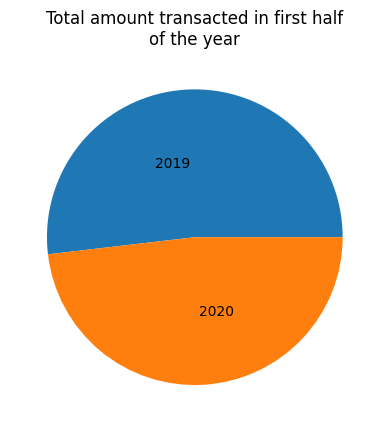

In [255]:
plt.pie(x=sum_df['Total amount till June'], labels=[2019, 2020], labeldistance=0.5)
plt.title("Total amount transacted in first half\nof the year");

In [256]:
df['category'].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

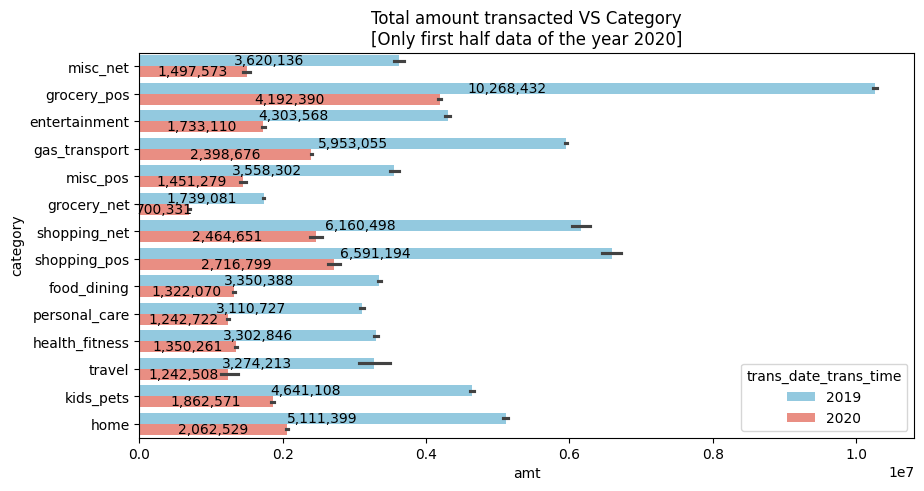

In [257]:
plt.figure(figsize=(10, 5))
plt.title("Total amount transacted VS Category\n[Only first half data of the year 2020]");
bar1 = sns.barplot(x = df['amt'], y = df['category'], estimator='sum',
            hue=pd.to_datetime(df['trans_date_trans_time']).dt.year, palette=custom_palette)


for i in bar1.containers:
    bar1.bar_label(i, label_type='center', labels=[f'{int(val):,}' for val in i.datavalues])

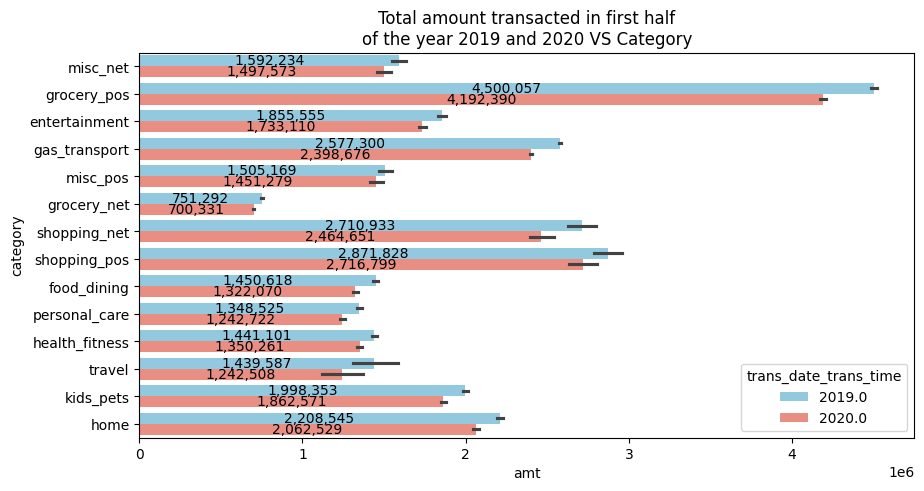

In [258]:
plt.figure(figsize=(10, 5))
plt.title("Total amount transacted in first half\nof the year 2019 and 2020 VS Category")
bar2 = sns.barplot(x = tmp['amt'], y = tmp['category'], estimator='sum',
            hue=tmp['trans_date_trans_time'],
            palette = custom_palette)


for i in bar2.containers:
    bar2.bar_label(i, label_type='center', labels=[f'{int(val):,}' for val in i.datavalues]);

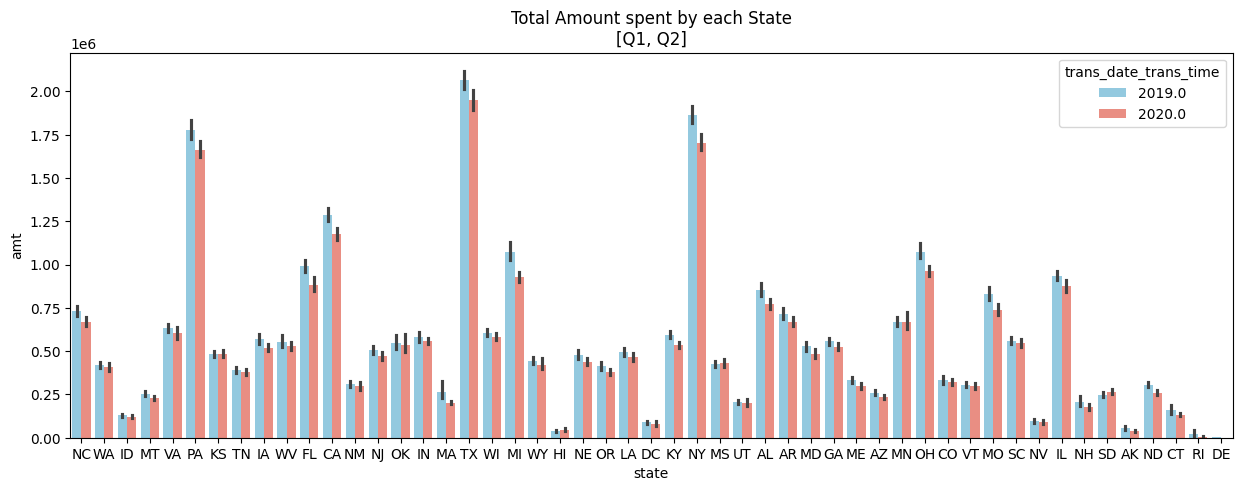

In [259]:
plt.figure(figsize=(15, 5))
plt.title("Total Amount spent by each State\n[Q1, Q2]")
sns.barplot(x = tmp['state'], y = tmp['amt'], hue=tmp['trans_date_trans_time'], palette=custom_palette, estimator='sum');

We notice that there's a decline in the transaction in almost entire country when comparing the first halves data of year 2019 and the year 2020.

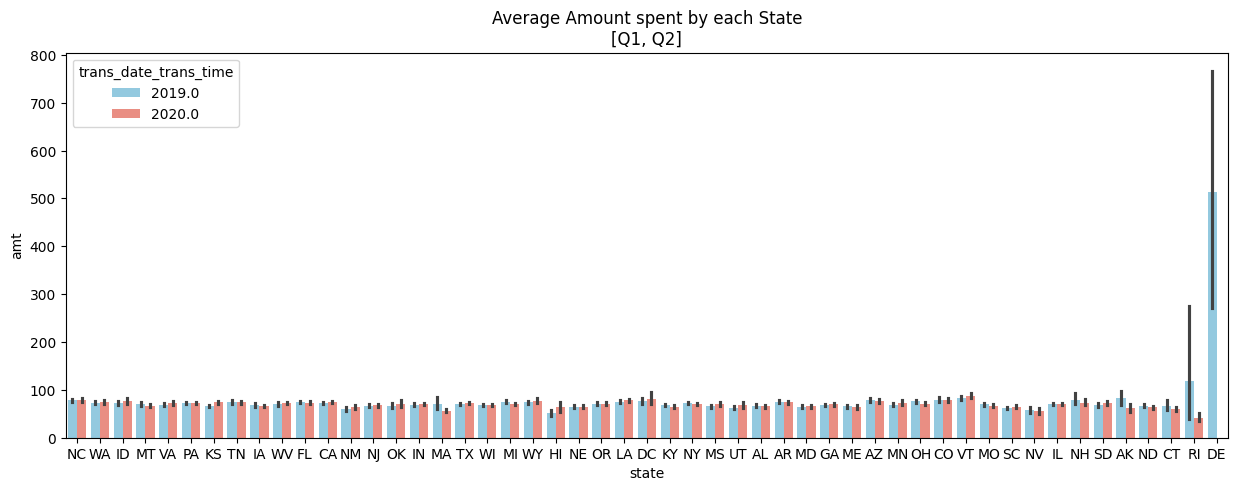

In [260]:
plt.figure(figsize=(15, 5))
plt.title("Average Amount spent by each State\n[Q1, Q2]")
sns.barplot(x = tmp['state'], y = tmp['amt'], hue=tmp['trans_date_trans_time'], palette=custom_palette);

Above plot shows that the average spending in first halves of the year 2020 is almost equal to the spending of 2019. Which may indicate that there's a spike in prices. Also, shows anomaly in the state RI and DE.

The unpredictable increase in transaction in the state of DE suggests anomaly or fradulent activity. The big Error scale recommends high variability in the data which supports the idea of fradulent activity being commited in the states RI and DE.

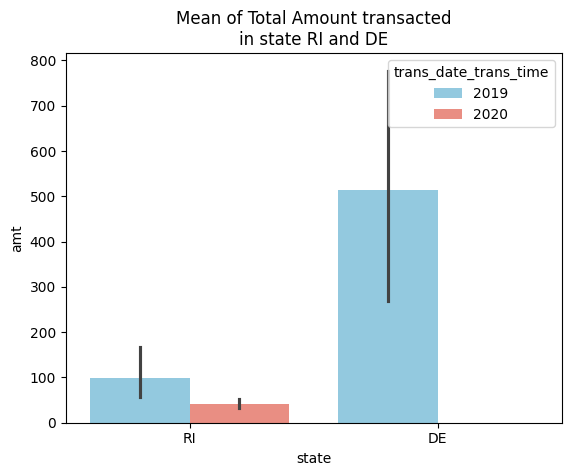

In [261]:
plt.title("Mean of Total Amount transacted\nin state RI and DE")
sns.barplot(x = df['state'].where((df['state'] == 'RI') | (df['state'] == 'DE')), y = df['amt'], hue = pd.to_datetime(df['trans_date_trans_time']).dt.year, 
            palette= custom_palette);

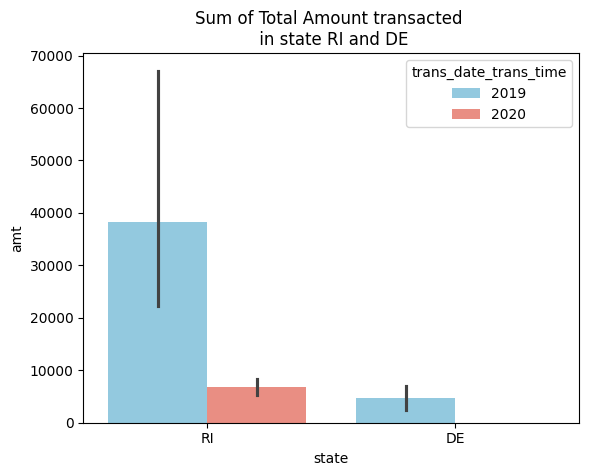

In [262]:
plt.title("Sum of Total Amount transacted \n in state RI and DE")
sns.barplot(x = df['state'].where((df['state'] == 'RI') | (df['state'] == 'DE')), y = df['amt'], hue = pd.to_datetime(df['trans_date_trans_time']).dt.year, 
            palette= custom_palette, estimator='sum');

From above 2 plots, we conclude, the most of the amount transacted in the state DE is mostly costly resulting in higher average and lower total spending. While, the state RI spent around $38,000 with an average of $100. Which indicates that the state RI is comparatively cheaper than the state DE. (Considering population count similar of the states)

In [263]:
print(df['city'].where(df['state'] == 'RI').unique())
print(df['city'].where(df['state'] == 'DE').unique())

[nan 'Providence']
[nan 'Georgetown']


### Data Wrangling

In [264]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

Removing columns - 'cc_num', 'merchant', 'first', 'last', 'gender', 'street', 'city', 'zip', 'job', 'trans_num', 'unix_time', 'merch_lat','merch_long'.

In [265]:
df.drop(['cc_num', 'merchant', 'first', 'last', 'gender', 'street', 'city', 'zip', 'job', 'trans_num', 'unix_time', 'merch_lat','merch_long'], 
        inplace=True, axis = 1)
df.columns

Index(['trans_date_trans_time', 'category', 'amt', 'state', 'lat', 'long',
       'city_pop', 'dob', 'is_fraud'],
      dtype='object')

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   category               1296675 non-null  object 
 2   amt                    1296675 non-null  float64
 3   state                  1296675 non-null  object 
 4   lat                    1296675 non-null  float64
 5   long                   1296675 non-null  float64
 6   city_pop               1296675 non-null  int64  
 7   dob                    1296675 non-null  object 
 8   is_fraud               1296675 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 89.0+ MB


In [267]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])
print(df['trans_date_trans_time'].dtype, df['dob'].dtype)

datetime64[ns] datetime64[ns]


Now, we'll change trans_date_trans_time to hours, to have a general understanding of time of the day 

In [268]:
df['trans_date_trans_time'] = df['trans_date_trans_time'].dt.hour
df = df.rename(columns = {'trans_date_trans_time': 'hour_transaction'})

In [269]:
def get_tod(hour):
    if 4 < hour['hour_transaction'] <= 12:
        ans = 'morning'
    elif 12 < hour['hour_transaction'] <= 20:
        ans = 'afternoon'
    elif hour['hour_transaction'] <= 4 or hour['hour_transaction'] > 20:
        ans = 'night'
    return ans

In [270]:
df['hour_transaction'] = df.apply(get_tod, axis = 1)
df.head(2)

,hour_transaction,category,amt,state,lat,long,city_pop,dob,is_fraud
0,night,misc_net,4.97,NC,36.0788,-81.1781,3495,1988-03-09,0
1,night,grocery_pos,107.23,WA,48.8878,-118.2105,149,1978-06-21,0


In [271]:
#dob to age
df['dob']= df['dob'].dt.year
df = df.rename(columns = {'dob': 'age'})

In [272]:
from datetime import datetime
df['age'] = datetime.now().year - df['age']

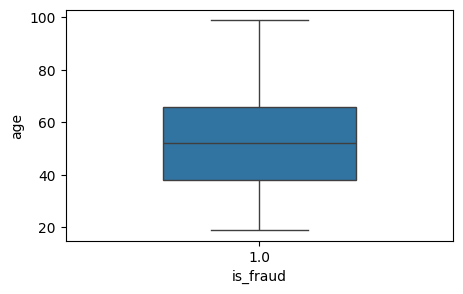

In [273]:
# Analyzing how many frauds occur for each age group
plt.figure(figsize=(5,3))
sns.boxplot(x = df['is_fraud'].where(df['is_fraud'] == 1), y = df['age'], width=0.5);

<Axes: xlabel='is_fraud', ylabel='count'>

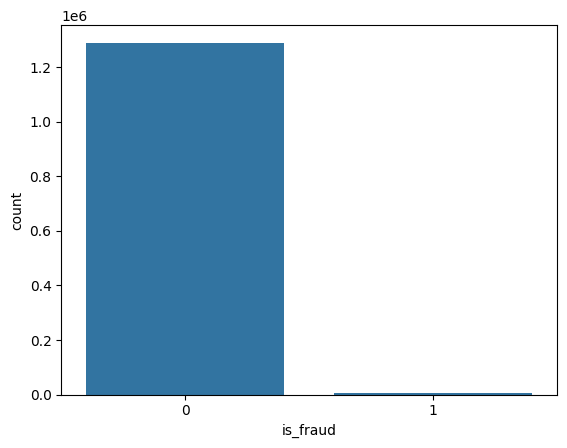

In [274]:
sns.countplot(x = df['is_fraud'])

Since, there's major imbalancement in the data, we'll undersample it to train our model more accurately.

In [275]:
df[df['is_fraud'] == 1]['is_fraud'].value_counts()

is_fraud
1    7506
Name: count, dtype: int64

In [276]:
fraud = df[df['is_fraud'] == 1]
not_fraud = df[df['is_fraud'] == 0]

print(len(fraud), len(not_fraud))

7506 1289169


In [277]:
df_balanced = pd.concat([fraud, not_fraud.sample(len(fraud))])

### Feature Engineering

In [278]:
df_balanced.head(2)

,hour_transaction,category,amt,state,lat,long,city_pop,age,is_fraud
2449,night,grocery_pos,281.06,NC,35.9946,-81.7266,885,36,1
2472,night,gas_transport,11.52,TX,29.4400,-98.4590,1595797,64,1


In [279]:
CATEGORICAL_FEATURES = [i for i in df_balanced.columns if df_balanced[i].dtype == 'object']
NUMERICAL_FEATURES = [i for i in df_balanced.columns if df_balanced[i].dtype == 'int64'
                      or df_balanced[i].dtype =='int32' 
                      or df_balanced[i].dtype =='float64']

In [280]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
encoder.fit(df_balanced[CATEGORICAL_FEATURES])

df_balanced[CATEGORICAL_FEATURES] = encoder.transform(df_balanced[CATEGORICAL_FEATURES])

## Model Generation

In [281]:
df_balanced[df_balanced['is_fraud'] == 1]

,hour_transaction,category,amt,state,lat,long,city_pop,age,is_fraud
2449,2.0,4.0,281.06,27.0,35.9946,-81.7266,885,36,1
2472,2.0,2.0,11.52,43.0,29.4400,-98.4590,1595797,64,1
2523,2.0,4.0,276.31,43.0,29.4400,-98.4590,1595797,64,1
2546,2.0,2.0,7.03,27.0,35.9946,-81.7266,885,36,1
2553,2.0,4.0,275.73,43.0,29.4400,-98.4590,1595797,64,1
...,...,...,...,...,...,...,...,...,...
1295399,2.0,11.0,977.01,9.0,27.6330,-80.4031,105638,38,1
1295491,2.0,11.0,1210.91,9.0,27.6330,-80.4031,105638,38,1
1295532,2.0,2.0,10.24,18.0,30.4590,-90.9027,71335,30,1
1295666,2.0,2.0,21.69,43.0,31.8599,-102.7413,23,55,1


In [282]:
x = df_balanced.drop(['is_fraud'], axis =1)
y = df_balanced['is_fraud']

In [283]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,)

Logistic Regression

In [284]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [285]:
from sklearn.metrics import classification_report
result = classification_report(y_test, y_pred)
print(result)

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      2214
           1       0.94      0.76      0.84      2290

    accuracy                           0.85      4504
   macro avg       0.87      0.85      0.85      4504
weighted avg       0.87      0.85      0.85      4504



Decision Tree Classifier

In [286]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

y_pred2 = classifier.predict(x_test)

In [287]:
result_classifier = classification_report(y_test, y_pred2)
print(result_classifier)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2214
           1       0.96      0.96      0.96      2290

    accuracy                           0.96      4504
   macro avg       0.96      0.96      0.96      4504
weighted avg       0.96      0.96      0.96      4504



Since, Decision Tree has better f1-score and accuracy, the best model for our dataset is Decision Tree than Logistic Regression.

## Testing model on test dataset

Fixing test dataset according to our model 

In [288]:
df_test = pd.read_csv("fraudTest.csv")
df_test.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [289]:
df_test.drop(['Unnamed: 0','cc_num', 'merchant', 'first', 'last', 'gender', 'street', 'city', 'zip', 'job', 'trans_num', 'unix_time', 'merch_lat','merch_long'], 
        inplace=True, axis = 1)
df_test.columns

Index(['trans_date_trans_time', 'category', 'amt', 'state', 'lat', 'long',
       'city_pop', 'dob', 'is_fraud'],
      dtype='object')

In [290]:
df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])
df_test['dob'] = pd.to_datetime(df_test['dob'])
print(df_test['trans_date_trans_time'].dtype, df_test['dob'].dtype)

datetime64[ns] datetime64[ns]


In [291]:
df_test['trans_date_trans_time'] = df_test['trans_date_trans_time'].dt.hour
df_test = df_test.rename(columns = {'trans_date_trans_time': 'hour_transaction'})

df_test['hour_transaction'] = df_test.apply(get_tod, axis = 1)

#dob to age
df_test['dob']= df_test['dob'].dt.year
df_test = df_test.rename(columns = {'dob': 'age'})

from datetime import datetime
df_test['age'] = datetime.now().year - df_test['age']

df_test.head(2)

,hour_transaction,category,amt,state,lat,long,city_pop,age,is_fraud
0,morning,personal_care,2.86,SC,33.9659,-80.9355,333497,56,0
1,morning,personal_care,29.84,UT,40.3207,-110.4360,302,34,0


In [292]:
CATEGORICAL_FEATURES = [i for i in df_test.columns if df_test[i].dtype == 'object']
NUMERICAL_FEATURES = [i for i in df_test.columns if df_test[i].dtype == 'int64'
                      or df_test[i].dtype =='int32' 
                      or df_test[i].dtype =='float64']

In [293]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
encoder.fit(df_test[CATEGORICAL_FEATURES])

df_test[CATEGORICAL_FEATURES] = encoder.transform(df_test[CATEGORICAL_FEATURES])

In [294]:
# X_test - has our new test data
X_test = df_test.drop('is_fraud', axis =1)

In [295]:
# classifier -> Decision Tree model
y_pred_test = classifier.predict(X_test)
y_pred_test

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

y_pred_test - has predictions for new transactions; if it's fraud or not.